<br><br><br><br><br>
## KNN (K-Nearest Neighbor)
***

Data Social Network Ads

### Import Package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier

### Import Dataset

In [2]:
%ls

 Volume in drive C is OS
 Volume Serial Number is 4CFB-1EDF

 Directory of C:\Users\User\Downloads\Tugas Python KNN_Bryan Yoga Adhi Nugraha

17/03/2022  14:36    <DIR>          .
17/03/2022  14:26    <DIR>          ..
17/03/2022  14:27    <DIR>          .ipynb_checkpoints
17/03/2022  14:36            35.505 Python KNN 1_Tugas Bryan Yoga Adhi Nugraha.ipynb
16/03/2022  10:57            10.926 Social_Network_Ads.csv
17/03/2022  14:35             1.377 Untitled.ipynb
               3 File(s)         47.808 bytes
               3 Dir(s)  18.395.181.056 bytes free


In [3]:
%pwd

'C:\\Users\\User\\Downloads\\Tugas Python KNN_Bryan Yoga Adhi Nugraha'

In [4]:
data = pd.read_csv('Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
data.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

###### Merubah variabel gender menjadi variabel dummy

In [6]:
data.drop(["User ID"],axis=1,inplace=True)
data.Gender=[1 if each== "Female" else 0 for each in data.Gender]
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


### Define X and Y

In [7]:
X = data.iloc[:,0:3]
Y = data['Purchased']

### Split Train Test

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=123)

### Variable Transformation
using nomalization (min-max scaler)

In [10]:
X_train.describe()

,Gender,Age,EstimatedSalary
count,320.000000,320.0000,320.000000
mean,0.515625,37.6500,68556.250000
std,0.500539,10.7815,32970.728326
min,0.000000,18.0000,15000.000000
25%,0.000000,29.0000,43000.000000
50%,1.000000,37.0000,68000.000000
75%,1.000000,46.0000,86000.000000
max,1.000000,60.0000,150000.000000


In [11]:
from sklearn.preprocessing import MinMaxScaler

list_scaler = []

for variabel in X.columns.tolist():
    scaler = MinMaxScaler()
    X_train[variabel] = scaler.fit_transform(np.array(X_train[variabel]).reshape(-1,1))
    list_scaler.append(scaler)

In [12]:
X_train.describe()

,Gender,Age,EstimatedSalary
count,320.000000,320.000000,320.000000
mean,0.515625,0.467857,0.396713
std,0.500539,0.256702,0.244228
min,0.000000,0.000000,0.000000
25%,0.000000,0.261905,0.207407
50%,1.000000,0.452381,0.392593
75%,1.000000,0.666667,0.525926
max,1.000000,1.000000,1.000000


### Modelling

In [14]:
k = np.sqrt(X_train.shape[0])/2
k

8.94427190999916

In [16]:
model = KNeighborsClassifier(n_neighbors=15) # euclidean distance

# Train Model
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=15)

### Prediksi

#### Train

In [17]:
pred_train = model.predict(X_train)

In [18]:
df_hasil_train = pd.DataFrame({'y_actual':Y_train,
                               'y_pred':pred_train})
df_hasil_train.head(n=5)

,y_actual,y_pred
178,0,0
252,1,1
6,0,0
274,1,1
125,0,0


In [19]:
df_hasil_train['y_pred'].value_counts()

0    210
1    110
Name: y_pred, dtype: int64

#### Test

In [20]:
X_test.describe()

,Gender,Age,EstimatedSalary
count,80.000000,80.000000,80.000000
mean,0.487500,37.675000,74487.500000
std,0.502997,9.254181,38129.026038
min,0.000000,19.000000,15000.000000
25%,0.000000,31.000000,43750.000000
50%,0.000000,37.000000,72500.000000
75%,1.000000,42.000000,98000.000000
max,1.000000,59.000000,150000.000000


In [21]:
# variable tranformation untuk data test

i = 0
for variabel in X_test.columns.tolist():
    scaler = list_scaler[i]
    X_test[variabel] = scaler.transform(np.array(X_test[variabel]).reshape(-1,1))
    i+=1

In [22]:
X_test.describe()

,Gender,Age,EstimatedSalary
count,80.000000,80.000000,80.000000
mean,0.487500,0.468452,0.440648
std,0.502997,0.220338,0.282437
min,0.000000,0.023810,0.000000
25%,0.000000,0.309524,0.212963
50%,0.000000,0.452381,0.425926
75%,1.000000,0.571429,0.614815
max,1.000000,0.976190,1.000000


In [23]:
pred_test = model.predict(X_test)

In [24]:
df_hasil_test = pd.DataFrame({'y_actual':Y_test,
                               'y_pred':pred_test})
df_hasil_test.head(n=5)

,y_actual,y_pred
234,0,1
42,0,1
303,1,0
155,0,0
342,0,0


In [25]:
df_hasil_test['y_pred'].value_counts()

0    47
1    33
Name: y_pred, dtype: int64

### Evaluation

In [26]:
from sklearn.metrics import confusion_matrix

#### Train

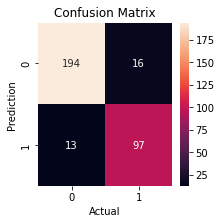

In [27]:
cm_train = confusion_matrix(Y_train, pred_train) # y_actual,y_prediksi

plt.figure(figsize=(3,3))
sns.heatmap(cm_train.T, annot=True, fmt='d')

plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

In [28]:
print(classification_report(Y_train, pred_train)) # y_actual,y_prediksi

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       207
           1       0.88      0.86      0.87       113

    accuracy                           0.91       320
   macro avg       0.90      0.90      0.90       320
weighted avg       0.91      0.91      0.91       320



#### Test

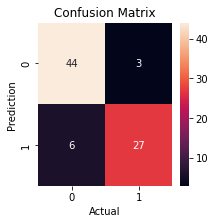

In [29]:
cm_test = confusion_matrix(Y_test, pred_test) # y_actual,y_prediksi

plt.figure(figsize=(3,3))
sns.heatmap(cm_test.T, annot=True, fmt='d')

plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

In [30]:
print(classification_report(Y_test, pred_test)) # y_actual,y_prediksi

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        50
           1       0.82      0.90      0.86        30

    accuracy                           0.89        80
   macro avg       0.88      0.89      0.88        80
weighted avg       0.89      0.89      0.89        80



### Tuning (pilih K)

In [31]:
# Transform dulu data test dengan scaler kita

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
#list_k = [5,6,7,8,9,10,11,12,13,14,15]
list_k = range(5,25)

list_simpan_k = []
list_acc = []
list_flag = []

for k in list_k :
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,Y_train)
    
    pred_train = model.predict(X_train)
    acc_train = accuracy_score(Y_train,pred_train)
    list_simpan_k.append(k)
    list_acc.append(acc_train)
    list_flag.append('train')
    
    pred_test = model.predict(X_test)
    acc_test = accuracy_score(Y_test,pred_test)
    list_simpan_k.append(k)
    list_acc.append(acc_test)
    list_flag.append('test')

In [34]:
df_tuning = pd.DataFrame({'k':list_simpan_k,
                          'accuracy':list_acc,
                          'flag':list_flag})
df_tuning

,k,accuracy,flag
0,5,0.931250,train
1,5,0.875000,test
2,6,0.931250,train
3,6,0.887500,test
4,7,0.928125,train
5,7,0.875000,test
6,8,0.918750,train
7,8,0.887500,test
8,9,0.918750,train
9,9,0.887500,test


<AxesSubplot:xlabel='k', ylabel='accuracy'>

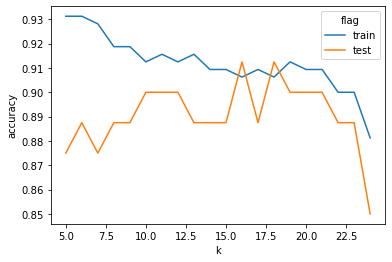

In [35]:
sns.lineplot(x='k',y='accuracy',hue='flag',data=df_tuning)

<div class="alert alert-block alert-success">Yeayy tugas telah selesai :)</div>

*********